<a href="https://colab.research.google.com/github/TranThaiAn19146304/AI_project/blob/main/nhandien_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BƯỚC 1: THÊM THƯ VIỆN**

In [1]:
#thêm một số thư viện cần thiết
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

In [2]:
#thêm hàm con để vẽ đồ thị
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

def plot_reg_history(history_fine):
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

**BƯỚC 2: NHẬN VÀ XỬ LÍ DỮ LIỆU**

In [3]:
# Load Data 
with open('data.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)


# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 3)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

**BƯỚC 3: TẠO MODEL**

In [4]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

**BƯỚC 4: TRAINING**

In [5]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
his = model.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_split = 0.2)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/4 [==============================] - 17s 1s/step - loss: 5.0625 - acc: 0.4458 - val_loss: 0.3216 - val_acc: 1.0000
Epoch 2/15
4/4 [==============================] - 1s 129ms/step - loss: 0.3410 - acc: 0.9042 - val_loss: 0.0547 - val_acc: 1.0000
Epoch 3/15
4/4 [==============================] - 1s 128ms/step - loss: 0.0575 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 4/15
4/4 [==============================] - 0s 128ms/step - loss: 0.0125 - acc: 1.0000 - val_loss: 2.0465e-05 - val_acc: 1.0000
Epoch 5/15
4/4 [==============================] - 1s 134ms/step - loss: 0.0043 - acc: 1.0000 - val_loss: 2.7849e-05 - val_acc: 1.0000
Epoch 6/15
4/4 [==============================] - 1s 132ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 2.6861e-06 - val_acc: 1.0000
Epoch 7/15
4/4 [==============================] - 1s 134ms/step - loss: 2.4702e-04 - acc: 1.0000 - val_loss: 5.7618e-08 - val_acc: 1.0000
Epoch 8/15
4/4 [==============================] - 0s 127ms/step - loss: 1.4683e-05 

**BƯỚC 5: KIỂM TRA CHẤT LƯỢNG**

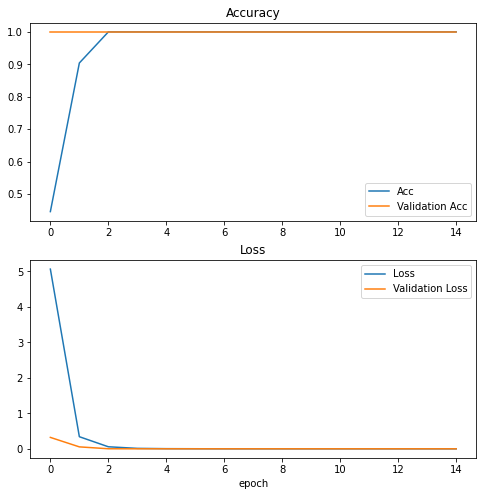

In [6]:
plot_history(his)

**BƯỚc 6: NHẬN DẠNG**

In [8]:
label = ['An', 'lưu', 'Nhật']

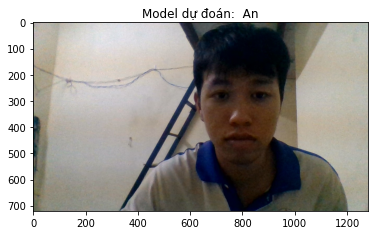

In [13]:
#lấy ảnh
img = cv2.resize(cv2.imread('an.jpg'), (150,150))
img = img.astype('float32')
img /= 255
img = img.reshape(1,150,150,3)

#nhận dạng 
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(img))])
plt.imshow(cv2.cvtColor(cv2.imread('an.jpg'), cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

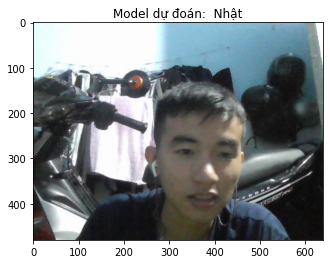

In [14]:
#lấy ảnh
img = cv2.resize(cv2.imread('nhat.jpg'), (150,150))
img = img.astype('float32')
img /= 255
img = img.reshape(1,150,150,3)

#nhận diện
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(img))])
plt.imshow(cv2.cvtColor(cv2.imread('nhat.jpg'), cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))